In [1]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
#plt.rcParams['font.family']='sans serif' #please remove this line if font is not installed
#plt.rcParams['font.sans-serif']='Arial' # please remove this line if Arial font is not installed
plt.rcParams['pdf.fonttype']=42
# sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap/"))
import PyComplexHeatmap as pch
print(pch.__version__)

import seaborn as sns
import matplotlib.pyplot as plt
import h5py
import scanpy as sc


1.8.2


In [2]:
print("Scanpy version:", sc.__version__)

Scanpy version: 1.10.4


In [3]:
adata_all = sc.read_h5ad('/home/junyichen/code/scmmd/output/atac0416/3REGIONS_gene.h5ad')


In [4]:
adata_all.obs.to_csv('/home/junyichen/code/scmmd/output/atac0416/ATACSC_3REGION_ALL_L1annoated.csv')

In [5]:
adata_all

AnnData object with n_obs × n_vars = 180153 × 55291
    obs: 'sample', 'leiden', 'leiden_tile', 'celltype.L1', 'leiden_0.5', 'celltype.L1.old'
    var: 'mean', 'std'
    uns: 'celltype.L1_colors', 'log1p'
    obsm: 'X_spectral_tile', 'X_umap', 'X_umap_tile'
    layers: 'count'

In [6]:
meta_atac = pd.read_csv('/data2st1/junyi/output/atac0416/ATACSC_3REGION_ALL_L2annoated.csv', index_col=0)


In [ ]:
# snap.pl.umap(adata_all, color='sample',marker_size=3)

In [7]:
meta_atac['Sample_name'] = meta_atac['sample']
meta_atac['Condition'] = meta_atac['Sample_name'].str[:2]
meta_atac['Region'] = meta_atac['Sample_name'].str.split('_').str[1]

In [8]:
meta_atac['Neurotransmitter_celltype'] = meta_atac['Neurotransmitter_celltype'].fillna('NN')

df_nt = meta_atac.groupby(['Sample_name','Neurotransmitter_celltype']).count()

In [9]:
df_nt

sample  leiden  leiden_tile  \
Sample_name Neurotransmitter_celltype                                
MC25A_PFC   GABAergic                    1566    1566         1566   
            Glutamatergic               13222   13222        13222   
            NN                           4212    4212         4212   
MC37A_AMY   GABAergic                    1879    1879         1879   
            Glutamatergic                3542    3542         3542   
            NN                            990     990          990   
MC39C_HIP   GABAergic                     465     465          465   
            Glutamatergic                6087    6087         6087   
            NN                           2898    2898         2898   
MC48D_HIP   GABAergic                     460     460          460   
            Glutamatergic                6177    6177         6177   
            NN                           2858    2858         2858   
MC50B_AMY   GABAergic                    3162    3162         3162   
            Glutamatergic                4478    4478         4478   
            NN                           1974    1974         1974   
MC50B_HIP   GABAergic                     276     276          276   
            Glutamatergic                3286    3286         3286   
            NN                           2011    2011         2011   
MC50B_PFC   GABAergic                     853     853          853   
            Glutamatergic                5170    5170         5170   
            NN                           2425    2425         2425   
MC52E_AMY   GABAergic                    2805    2805         2805   
            Glutamatergic                5829    5829         5829   
            NN                           1661    1661         1661   
MC52E_PFC   GABAergic                     707     707          707   
            Glutamatergic                4115    4115         4115   
            NN                           2481    2481         2481   
MW26A_PFC   GABAergic                    1862    1862         1862   
            Glutamatergic               12953   12953        12953   
            NN                           4186    4186         4186   
MW45A_HIP   GABAergic                     603     603          603   
            Glutamatergic                7720    7720         7720   
            NN                           4165    4165         4165   
MW47A_AMY   GABAergic                    3745    3745         3745   
            Glutamatergic                6043    6043         6043   
            NN                           2465    2465         2465   
MW47A_HIP   GABAergic                     799     799          799   
            Glutamatergic                8748    8748         8748   
            NN                           4367    4367         4367   
MW47A_PFC   GABAergic                     972     972          972   
            Glutamatergic                5336    5336         5336   
            NN                           2383    2383         2383   
MW51A_AMY   GABAergic                    2325    2325         2325   
            Glutamatergic                3867    3867         3867   
            NN                           1767    1767         1767   
MW51A_HIP   GABAergic                     561     561          561   
            Glutamatergic                5981    5981         5981   
            NN                           2598    2598         2598   
MW51A_PFC   GABAergic                    1103    1103         1103   
            Glutamatergic                7276    7276         7276   
            NN                           2739    2739         2739   

                                       celltype.L1  celltype.L2  region  \
Sample_name Neurotransmitter_celltype                                     
MC25A_PFC   GABAergic                         1566         1566    1566   
            Glutamatergic                    13222        13222   13222   
            NN              

In [10]:
df_nt2 = df_nt.iloc[:,:1].reset_index().pivot(index='Sample_name', columns='Neurotransmitter_celltype', values='sample').reset_index().set_index('Sample_name')

In [11]:
df_nt2

Neurotransmitter_celltype,GABAergic,Glutamatergic,NN
Sample_name,,,
MC25A_PFC,1566,13222,4212
MC37A_AMY,1879,3542,990
MC39C_HIP,465,6087,2898
MC48D_HIP,460,6177,2858
MC50B_AMY,3162,4478,1974
MC50B_HIP,276,3286,2011
MC50B_PFC,853,5170,2425
MC52E_AMY,2805,5829,1661
MC52E_PFC,707,4115,2481


In [12]:
df = pd.DataFrame(['GroupA'] * 5 + ['GroupB'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['EF'] = ['E'] * 6 + ['F'] * 2 + ['H'] * 2
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df.head()

,AB,CD,EF,F
sample1,GroupA,C,E,1.431093
sample2,GroupA,C,E,-1.713526
sample3,GroupA,C,E,1.155012
sample4,GroupA,D,E,0.016355
sample5,GroupA,D,E,0.056371


Starting plotting HeatmapAnnotations


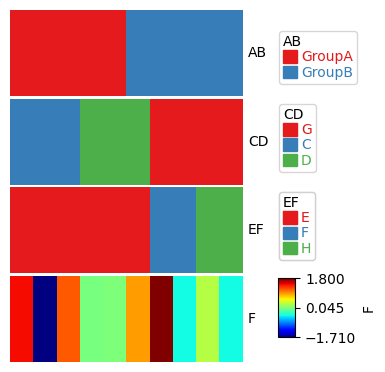

In [13]:
plt.figure(figsize=(3, 4))
col_ha = pch.HeatmapAnnotation(df=df,plot=True,legend=True,legend_gap=5,hgap=0.5,axis=1)
plt.show()


In [14]:
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar1 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T1-A', 'T1-B'])
df_bar1.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar4 = pd.DataFrame(np.random.uniform(0, 10, (10, 1)), columns=['T4'])
df_bar4.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar4.iloc[7,0]=np.nan

In [81]:
df_box

,Gene1,Gene2,Gene3,Gene4
sample1,-0.986166,-1.780262,1.318132,0.513931
sample2,1.332176,0.653080,-0.197587,-0.337025
sample3,1.519577,-1.357814,-0.074574,0.391242
sample4,1.186813,-0.981501,-2.162203,0.167465
sample5,-0.104080,0.192411,-1.322925,-0.143607
sample6,-0.514358,-0.381275,-0.498957,1.128540
sample7,-0.419230,-0.645088,0.474775,-1.859633
sample8,0.546852,-0.003672,-0.258708,-0.773456
sample9,1.777686,-0.790836,2.598844,0.273857
sample10,-1.059648,-0.366155,-1.797310,-1.181318


In [80]:
df_bar1

,T1-A,T1-B
sample1,8.255582,0.928721
sample2,3.895994,1.233117
sample3,1.621608,7.084733
sample4,0.876790,5.712306
sample5,5.268859,3.212787
sample6,8.810977,6.019664
sample7,6.248821,2.208143
sample8,9.117147,8.470102
sample9,1.163962,8.220201
sample10,8.304392,0.045398


Starting plotting HeatmapAnnotations


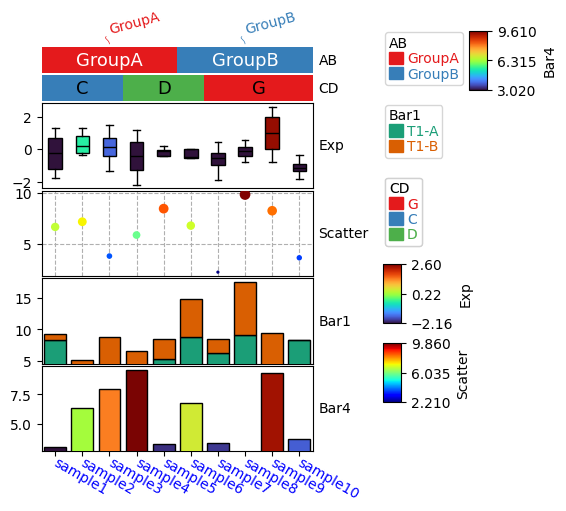

In [16]:
plt.figure(figsize=(3.5, 5))
col_ha = pch.HeatmapAnnotation(label=pch.anno_label(df.AB, merge=True,rotation=15),
                            AB=pch.anno_simple(df.AB,add_text=True,legend=True), axis=1,
                            CD=pch.anno_simple(df.CD, add_text=True,legend=True,text_kws={'color':'black'}),
                            Exp=pch.anno_boxplot(df_box, cmap='turbo',legend=True),
                            Scatter=pch.anno_scatterplot(df_scatter,grid=True),
                           Bar1=pch.anno_barplot(df_bar1,legend=True,cmap='Dark2'),
                           Bar4=pch.anno_barplot(df_bar4,legend=True,cmap='turbo'),
                           plot=True,legend=True,legend_gap=5,hgap=0.5)
col_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'blue'},rotation=-30)
plt.show()


In [ ]:
# plt.figure(figsize=(30, 4))
# col_ha = pch.HeatmapAnnotation(df=meta_atac.loc[:,['Sample_name','Condition','Region']],
#                                cmap ={'Sample_name':'tab20','Condition':'Set2','Region':'Set1'},
#                                plot=True,legend=True,legend_gap=0,hgap=0.5,axis=1)

# plt.tight_layout()
# plt.show()


In [ ]:
meta_atac.Condition

In [17]:
ntc = meta_atac.groupby(['sample','Neurotransmitter_celltype']).count()['leiden'].reset_index().pivot(index='sample', columns='Neurotransmitter_celltype', values='leiden')

In [18]:
df = meta_atac

In [19]:
cdt = meta_atac.Condition

In [20]:
summary = df.groupby(['sample', 'Neurotransmitter_celltype']).size().unstack(fill_value=0)
summary = summary.div(summary.sum(axis=1), axis=0)  # Normalize rows to proportions


In [92]:
cdt= meta_atac.loc[:,['Sample_name','Condition']].drop_duplicates(['Sample_name']).set_index('Sample_name')

In [94]:
cdt.sort_values(by='Condition', inplace=True)

In [97]:
cdt

,Condition
Sample_name,
MC37A_AMY,MC
MC39C_HIP,MC
MC48D_HIP,MC
MC50B_AMY,MC
MC50B_HIP,MC
MC50B_PFC,MC
MC52E_AMY,MC
MC52E_PFC,MC
MC25A_PFC,MC


In [ ]:
df_ntrd = df_nt2.reset_index()

In [104]:
df_nt2.loc[cdt.index].iloc[:,:2]

Neurotransmitter_celltype,GABAergic,Glutamatergic
Sample_name,,
MC37A_AMY,1879,3542
MC39C_HIP,465,6087
MC48D_HIP,460,6177
MC50B_AMY,3162,4478
MC50B_HIP,276,3286
MC50B_PFC,853,5170
MC52E_AMY,2805,5829
MC52E_PFC,707,4115
MC25A_PFC,1566,13222


In [32]:
df_ntrd.reset_index(inplace=True)

Sample_name
MC25A_PFC    19000
MC37A_AMY     6411
MC39C_HIP     9450
MC48D_HIP     9495
MC50B_AMY     9614
MC50B_HIP     5573
MC50B_PFC     8448
MC52E_AMY    10295
MC52E_PFC     7303
MW26A_PFC    19001
MW45A_HIP    12488
MW47A_AMY    12253
MW47A_HIP    13914
MW47A_PFC     8691
MW51A_AMY     7959
MW51A_HIP     9140
MW51A_PFC    11118
dtype: int64

In [70]:
dict_pro = {col: np.round(df_ntrd[col].values/df_nt2.sum(axis=1).values * 100) for col in df_ntrd.columns if col not in ['Sample_name', 'index']}

In [71]:
df_pro = pd.DataFrame(dict_pro)

In [72]:
df_pro

,GABAergic,Glutamatergic,NN
0,8.0,70.0,22.0
1,29.0,55.0,15.0
2,5.0,64.0,31.0
3,5.0,65.0,30.0
4,33.0,47.0,21.0
5,5.0,59.0,36.0
6,10.0,61.0,29.0
7,27.0,57.0,16.0
8,10.0,56.0,34.0
9,10.0,68.0,22.0


In [75]:
df_pro.index = df_ntrd['Sample_name'].values

In [78]:
cdt

,Condition
Sample_name,
MC37A_AMY,MC
MC39C_HIP,MC
MC48D_HIP,MC
MC50B_AMY,MC
MC50B_HIP,MC
MC50B_PFC,MC
MC52E_AMY,MC
MC52E_PFC,MC
MC25A_PFC,MC


In [85]:
df_pro

,GABAergic,Glutamatergic,NN
MC25A_PFC,8.0,70.0,22.0
MC37A_AMY,29.0,55.0,15.0
MC39C_HIP,5.0,64.0,31.0
MC48D_HIP,5.0,65.0,30.0
MC50B_AMY,33.0,47.0,21.0
MC50B_HIP,5.0,59.0,36.0
MC50B_PFC,10.0,61.0,29.0
MC52E_AMY,27.0,57.0,16.0
MC52E_PFC,10.0,56.0,34.0
MW26A_PFC,10.0,68.0,22.0


In [91]:
cdt.reset_index()

,Sample_name,Condition
0,MC37A_AMY,MC
1,MC39C_HIP,MC
2,MC48D_HIP,MC
3,MC50B_AMY,MC
4,MC50B_HIP,MC
5,MC50B_PFC,MC
6,MC52E_AMY,MC
7,MC52E_PFC,MC
8,MC25A_PFC,MC
9,MW51A_PFC,MW


In [114]:
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 3)), 
                     columns=['T1', 'T2', 'T3'],
                     index=['sample' + str(i) for i in range(1, 11)])


In [ ]:
# plt.figure(figsize=(5, 4))
# bar_anno = pch.HeatmapAnnotation(
#     TMB=pch.anno_barplot(df_bar, stacked=True, cmap='Set1', legend=True),
#     verbose=0
# )

# plt.show()


<Figure size 500x400 with 0 Axes>

,Condition
Sample_name,
MC37A_AMY,MC
MC52E_AMY,MC
MW47A_AMY,MW
MC50B_AMY,MC
MW51A_AMY,MW
MW47A_HIP,MW
MC39C_HIP,MC
MC48D_HIP,MC
MW51A_HIP,MW


In [ ]:
meta_atac.columns

In [ ]:
meta_atac.sort_values('Region')['sample'].unique()

In [ ]:
sns.color_palette("Set2")

/tmp/ipykernel_500460/3095197632.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Celltype Proportions per Sample'}, xlabel='sample', ylabel='Proportion (%)'>)

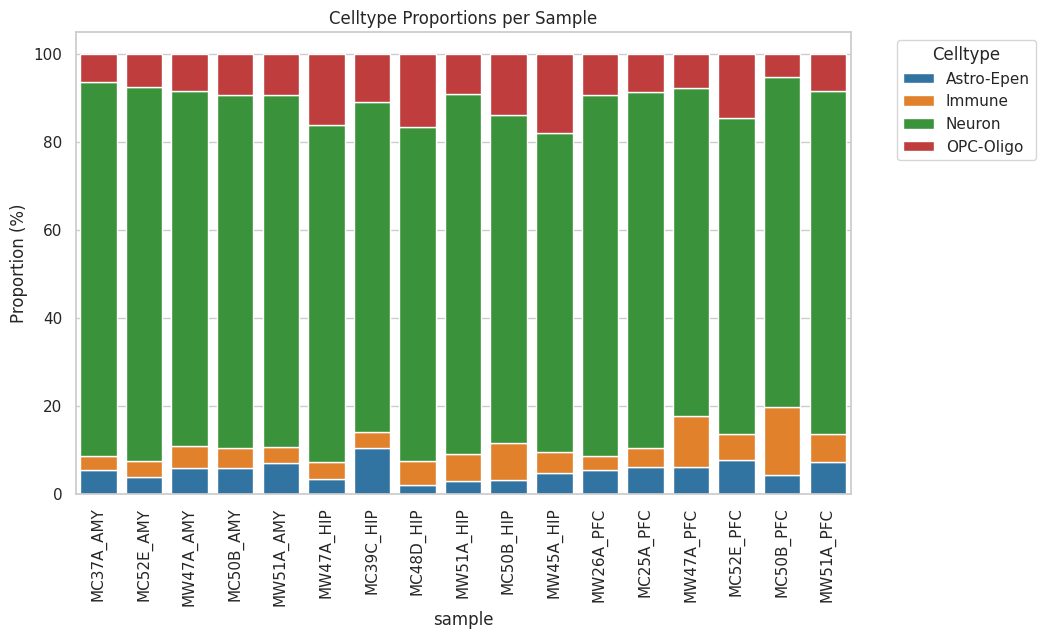

In [144]:
def plot_stack_prop(df,x=None, y='proportion',pro_col='celltype.L1',color_palette=sns.color_palette("Set2"), figsize=(10, 6),x_order=None, **kwargs):
    counts = df.groupby([x, pro_col]).size().unstack(fill_value=0)
    # If x_order is provided, sort the index of counts
    if x_order is not None:
        counts = counts.loc[x_order]
    df_prop = counts.div(counts.sum(axis=1), axis=0) * 100
    df_prop = df_prop.reset_index().melt(id_vars=x, var_name=pro_col, value_name=y)
    fig, ax = plt.subplots(figsize=figsize)
    sns.set(style="whitegrid")
    # Initialize bottom positions for stacking
        # Sort the dataframe by the specified order by the column of sample name
    bottom = pd.Series([0] * len(df_prop[x].unique()), index=df_prop[x].unique())
    # Plot each celltype layer
    for i, celltype in enumerate(df_prop[pro_col].unique()):
        subset = df_prop[df_prop[pro_col] == celltype]
        sns.barplot(
            x=x, y=y, data=subset,
            label=celltype, bottom=bottom[subset[x]],
            color=color_palette[i],
            dodge=False
        )
        bottom += subset.set_index(x)[y].reindex(bottom.index, fill_value=0)
    ax.set_title('Celltype Proportions per Sample')
    ax.set_ylabel('Proportion (%)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.legend(title='Celltype', bbox_to_anchor=(1.05, 1))
    return fig,ax

order = meta_atac.sort_values('Region')['sample'].unique()
plot_stack_prop(meta_atac,x='sample', y='proportion',color_palette=sns.color_palette("tab10"),x_order=order, figsize=(10, 6))

In [137]:
cdt

,Condition
Sample_name,
MC37A_AMY,MC
MC52E_AMY,MC
MW47A_AMY,MW
MC50B_AMY,MC
MW51A_AMY,MW
MW47A_HIP,MW
MC39C_HIP,MC
MC48D_HIP,MC
MW51A_HIP,MW


In [139]:
br

,Region
Sample_name,
MC37A_AMY,AMY
MC39C_HIP,HIP
MC48D_HIP,HIP
MC50B_AMY,AMY
MC50B_HIP,HIP
MC50B_PFC,PFC
MC52E_AMY,AMY
MC52E_PFC,PFC
MW45A_HIP,HIP


Starting plotting HeatmapAnnotations


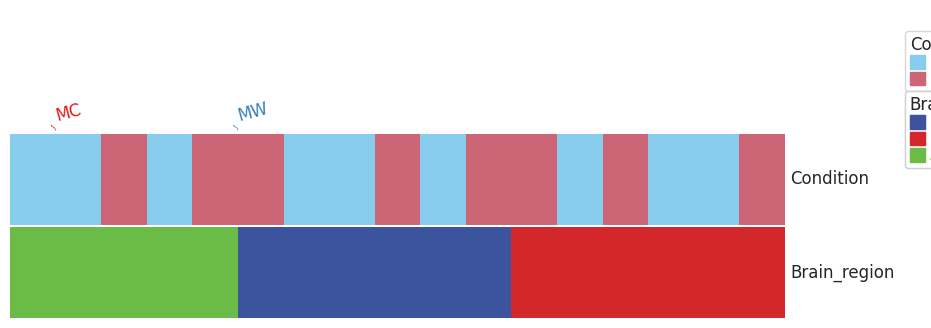

In [172]:
cdt= cdt.loc[order]

br= meta_atac.loc[:,['Sample_name','Region']].drop_duplicates(['Sample_name']).set_index('Sample_name')
plt.figure(figsize=(10, 4))
col_ha = pch.HeatmapAnnotation(
                                label=pch.anno_label(cdt.Condition, merge=True,rotation=15),
                                #Sample_name=pch.anno_simple(ntc.reset_index()['sample'],legend=True), axis=1,

                                 #Sample_name=pch.anno_simple(meta_atac.Sample_name,add_text=True,legend=True),
                                Condition=pch.anno_simple(cdt.Condition, add_text=False,legend=True,text_kws={'color':'black'},cmap='Safe'),
                                Brain_region=pch.anno_simple(br.Region, add_text=False,legend=True,text_kws={'color':'black'},cmap='nature6_2'),

                            #    pro=pch.anno_barplot(df=df_pro.iloc[:,1:],legend=True,cmap='tab10',stacked=True),
                               plot=True,legend=True,legend_gap=0,hgap=0.5)
plt.show()


In [123]:
meta_atac

,sample,leiden,leiden_tile,celltype.L1,celltype.L2,region,Neurotransmitter_celltype,region_nt,Sample_name,Condition,Region
MC37A_AMY:AAACGAAAGAGTGGAA-1,MC37A_AMY,5,5,Neuron,AMY Meis1 Glut,AMY,Glutamatergic,AMY_Glut,MC37A_AMY,MC,AMY
MC37A_AMY:AAACGAAAGGGTAGTC-1,MC37A_AMY,9,9,Immune,Immune,AMY,NN,NN,MC37A_AMY,MC,AMY
MC37A_AMY:AAACGAAGTACGGAGT-1,MC37A_AMY,1,1,Neuron,AMY Egfr GABA,AMY,GABAergic,AMY_GABA,MC37A_AMY,MC,AMY
MC37A_AMY:AAACGAAGTCAGCAAG-1,MC37A_AMY,5,5,Neuron,AMY Gad2 GABA,AMY,GABAergic,AMY_GABA,MC37A_AMY,MC,AMY
MC37A_AMY:AAACGAAGTCCGAGCT-1,MC37A_AMY,2,2,Neuron,AMY Slc17a6 Glut,AMY,Glutamatergic,AMY_Glut,MC37A_AMY,MC,AMY
...,...,...,...,...,...,...,...,...,...,...,...
MW26A_PFC:TTTGTGTTCCGTACGG-1,MW26A_PFC,7,7,Neuron,PFC L2/3 IT,PFC,Glutamatergic,PFC_Glut,MW26A_PFC,MW,PFC
MW26A_PFC:TTTGTGTTCCTATCAT-1,MW26A_PFC,0,0,Neuron,PFC L4/5 IT,PFC,Glutamatergic,PFC_Glut,MW26A_PFC,MW,PFC
MW26A_PFC:TTTGTGTTCCTGACCT-1,MW26A_PFC,16,16,Neuron,PFC Doublet,PFC,NN,NaN,MW26A_PFC,MW,PFC
MW26A_PFC:TTTGTGTTCGTAGCGC-1,MW26A_PFC,13,13,Neuron,PFC L2/3 IT,PFC,Glutamatergic,PFC_Glut,MW26A_PFC,MW,PFC


/tmp/ipykernel_500460/3095197632.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Celltype Proportions per Sample'}, xlabel='sample', ylabel='Proportion (%)'>)

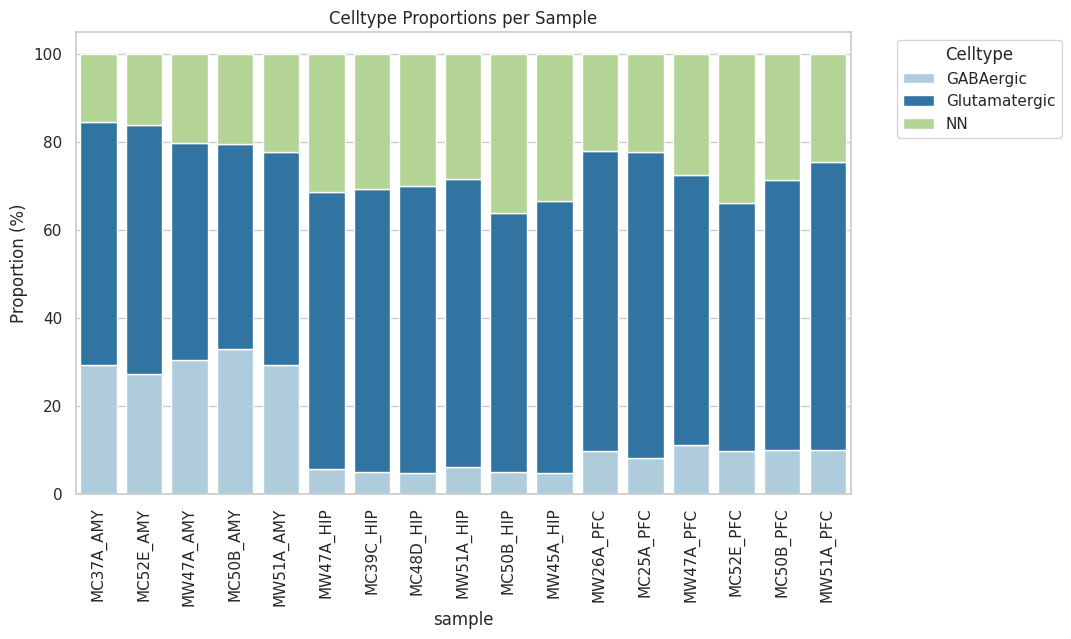

In [174]:
plot_stack_prop(meta_atac,x='sample',pro_col='Neurotransmitter_celltype', y='proportion',color_palette=sns.color_palette("Paired"),x_order=order, figsize=(10, 6))

In [148]:
colors = np.random.rand(50, 3)  # 50 colors, each with RGB values
from matplotlib.colors import ListedColormap

# Create a ListedColormap
cmap = ListedColormap(colors)


/tmp/ipykernel_500460/3095197632.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Celltype Proportions per Sample'}, xlabel='sample', ylabel='Proportion (%)'>)

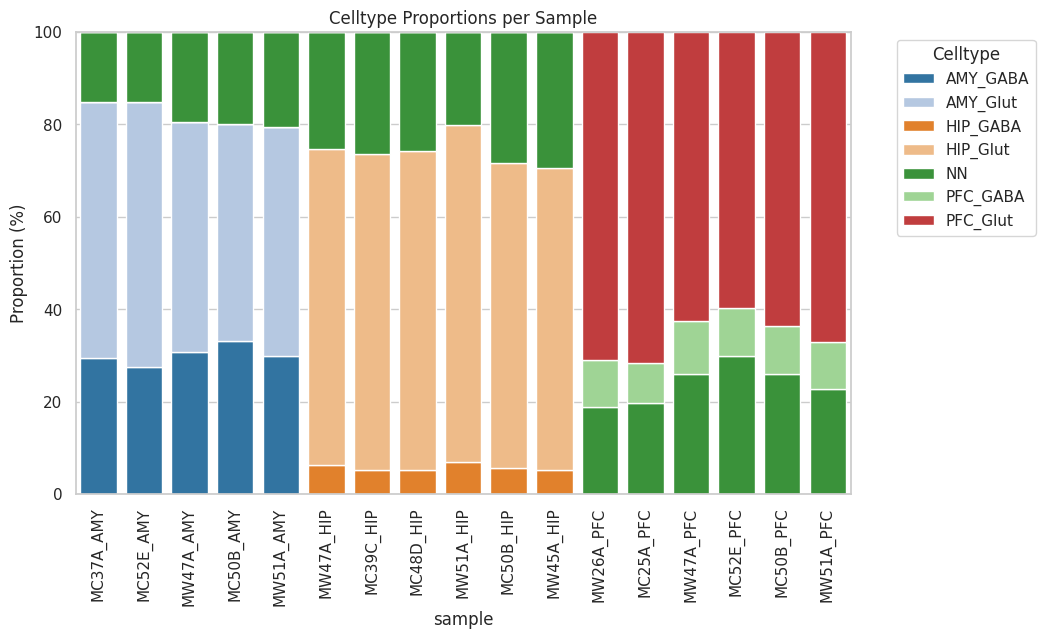

In [151]:
plot_stack_prop(meta_atac,x='sample',pro_col='region_nt', y='proportion',color_palette=sns.color_palette("tab20"),x_order=order, figsize=(10, 6))

In [ ]:
df_marker = pd.read_excel("/data2st1/junyi/output/atac0416/20250423maker list.xlsx")

In [ ]:
df_all_meta = pd.DataFrame()

for region in meta_atac['Region'].unique():
    df_neu = pd.read_csv(f'/data2st1/junyi/output/atac0416/ATACSC_{region}_Neuron_L2annoated.csv', index_col=0)  

    df_region_marker = df_marker[df_marker['region'] == region]

    if region == 'PFC':
        df_neu['celltype.L2'] = "PFC " + df_neu['celltype.L2']
 
    df_neu_merge = df_neu.merge(df_region_marker, left_on='celltype.L2',right_on='celltype.L2', how='left')
    df_neu_merge.index = df_neu.index

    
    if len(df_all_meta) > 0:
        df_all_meta = pd.concat([df_all_meta, df_neu_merge], axis=0)
    else:
        df_all_meta = df_neu_merge

df_all_meta.index = df_all_meta.index.str.replace('_query', '')

In [ ]:
df_all_meta

In [ ]:
adata_all.obs['celltype.L2']=adata_all.obs['celltype.L1'].astype(str)
adata_all.obs['region'] = adata_all.obs['sample'].str.split('_').str[1]
adata_all.obs['Neurotransmitter_celltype'] = 'NN'


In [ ]:
adata_all.obs.loc[df_all_meta.index,'celltype.L2'] = df_all_meta['celltype.L2'].astype(str)

adata_all.obs.loc[df_all_meta.index,'Neurotransmitter_celltype'] = df_all_meta['Neurotransmitter_celltype'].astype(str)

adata_all.obs['region_nt'] = adata_all.obs['region'].astype(str) +"_"+ adata_all.obs['Neurotransmitter_celltype'].str[:4].astype(str)
adata_all.obs.loc[adata_all.obs['region_nt'].str.contains('NN'),'region_nt'] = "NN"
adata_all.obs.loc[adata_all.obs['region_nt'].str.contains('nan'),'region_nt'] = np.nan

In [ ]:
sc.pl.umap(adata_all, color=['region_nt'], size=5, legend_fontsize=8, title='L2 celltype', frameon=False, show=True,legend_loc='on data', 
           legend_fontoutline=2,save='01_umap_3region.svg',)

In [ ]:
(adata_all.obs['region'].str.contains('AMY'))

In [ ]:
amy_adata = adata_all[(adata_all.obs['region_nt']!='NN') & (adata_all.obs['region'].str.contains('AMY'))]

In [ ]:
sc.pl.umap(amy_adata, color=['Tenm2'])

In [ ]:
snap.pl.umap(amy_adata,color='sample',marker_size=2)

In [ ]:
amy_adata.obs['Condition'] = amy_adata.obs['sample'].str[:2]

In [ ]:
sc.tl.rank_genes_groups(amy_adata, groupby='leiden',reference='rest',groups=['3'],pts=True)

In [ ]:
sc.get.rank_genes_groups_df(amy_adata, group='3').to_csv('/data2st1/junyi/output/atac0416/AMY_3_leiden.csv')

In [ ]:
sc.pl.violin(amy_adata, keys=sc.get.rank_genes_groups_df(amy_adata, group='3').head(10)['names'], groupby='leiden')

In [ ]:
sc.tl.rank_genes_groups(amy_adata, groupby='Condition',reference='rest',pts=True,layer='count')

In [ ]:
sc.get.rank_genes_groups_df(amy_adata, group='MC').to_csv('/data2st1/junyi/output/atac0416/AMY_MC_leiden.csv')

In [ ]:
adata_all.obs.to_csv('/home/junyichen/code/scmmd/output/atac0416/ATACSC_3REGION_ALL_L2annoated.csv')

In [ ]:
df_neurons = pd.DataFrame()
for region in meta_atac['Region'].unique():
    df_neuron = pd.read_csv(f'/data2st1/junyi/output/atac0416/ATACSC_{region}_Neuron_L2annoated.csv', index_col=0)  
    df_neuron = df_neuron[~df_neuron['celltype.L2'].isin(['Doublet','Not sure'])]
    df_neuron['Sample_name'] = df_neuron['sample']
    df_neuron['Condition'] = df_neuron['Sample_name'].str[:2]
    df_neuron['Region'] = df_neuron['Sample_name'].str.split('_').str[1]
    df_region_marker = df_marker[df_marker['region'] == region]

    if region == 'PFC':
        df_neuron['celltype.L2'] = "PFC " + df_neuron['celltype.L2']
 
    df_neuron = df_neuron.merge(df_region_marker, left_on='celltype.L2',right_on='celltype.L2', how='left')

    plot_stack_prop(df_neuron,x='Sample_name', y='proportion',pro_col='celltype.L2',color_palette=sns.color_palette('tab20'), figsize=(10, 6))

    if len(df_region_marker) > 0:
        df_neurons = pd.concat([df_neurons, df_neuron], axis=0)
    else:
        df_neuron = df_neuron

In [ ]:

plot_stack_prop(df_neurons,x='sample', y='proportion',pro_col='Neurotransmitter_celltype',x_order=order, figsize=(10, 6))


In [ ]:
df_neurons

In [ ]:
plt.figure(figsize=(30, 4))
col_ha = pch.HeatmapAnnotation(df=df_neurons.loc[:,['Neurotransmitter_celltype','Sample_name','Condition','Region']],
                               cmap ={'Neurotransmitter_celltype':'Pastel1','Sample_name':'Accent','Condition':'Set2','Region':'Set1'},
                               plot=True,legend=False,legend_gap=0,hgap=0.5,axis=1)
plt.tight_layout()
plt.show()
